In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
# Let's read the data...
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#..and create a new data frame in case we want later on
# to work with the initial dataframe
train = train_data.copy()
test = test_data.copy()

In [69]:
# Let's have a first quick look at the data:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
# So there are 81 features in the dataset and...
train.shape[0]

1460

In [71]:
# ....ideally each variable should have 1460 data points.
# Our target variable is the SalePrice (the one we want to predict, 
# it's the last column of the train dataframe)

In [72]:
# What about missing values?
# Creating a simple function to get a quick view of the missing values:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [73]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [74]:
# Here we fill NAs with their proper value according to the data_description file
# So they are not really NAs..
train['PoolQC'] = train['PoolQC'].fillna('No Pool') 
train['MiscFeature'] = train['MiscFeature'].fillna('None') 
train['Alley'] = train['Alley'].fillna('No alley access')
train['Fence'] = train['Fence'].fillna('No Fence')
train['FireplaceQu'] = train['FireplaceQu'].fillna('No Fireplace')
train['GarageType'] = train['GarageType'].fillna('No Garage')
train['GarageYrBlt'] = train['GarageYrBlt'].fillna('No Garage')
train['GarageFinish'] = train['GarageFinish'].fillna('No Garage')
train['GarageQual'] = train['GarageQual'].fillna('No Garage')
train['GarageCond'] = train['GarageCond'].fillna('No Garage')
train['BsmtExposure'] = train['BsmtExposure'].fillna('No Basement')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('No Basement')
train['BsmtQual'] = train['BsmtQual'].fillna('No Basement')
train['BsmtCond'] = train['BsmtCond'].fillna('No Basement')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('No Basement')
train['MasVnrType'] = train['MasVnrType'].fillna("None")
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
# Filling the 1 missing value with the mode of Electrical
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [75]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,259,17.7


In [ ]:
# Quickly check if median LotFrontage for each Neighborhood is significantly different from one another...
# (see here: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)

In [76]:
train.groupby("Neighborhood").median()[['LotFrontage']]

,LotFrontage
Neighborhood,
Blmngtn,43.0
Blueste,24.0
BrDale,21.0
BrkSide,52.0
ClearCr,80.0
CollgCr,70.0
Crawfor,74.0
Edwards,65.5
Gilbert,65.0


In [77]:
# It seems reasonable to fill LotFrontage NAs according to the median value of each neighborhood:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [78]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
# Ok so now no feature has missing values 

In [99]:
# It would also be useful to have consistent data types across features. 
# So we will create a dataframe that shows the value counts and type of each feature:

In [100]:
my_value_counts_df = pd.DataFrame(np.nan, index=range(
    len(train.columns)), columns=['Feature', 'Value_Counts', 'Type'])
for k in range(len(train.columns)):
    my_value_counts_df.iloc[k, 0] = train.columns[k]
    my_value_counts_df.iloc[k, 1] = len(train.iloc[:,k].value_counts())
    my_value_counts_df.iloc[k, 2] = str(type(train.iloc[0,k]))  

In [101]:
my_value_counts_df.sort_values(by='Value_Counts', ascending=False).head()

,Feature,Value_Counts,Type
0,Id,1460.0,<type 'numpy.int64'>
4,LotArea,1073.0,<type 'numpy.int64'>
46,GrLivArea,861.0,<type 'numpy.int64'>
37,BsmtUnfSF,780.0,<type 'numpy.int64'>
43,1stFlrSF,753.0,<type 'numpy.int64'>


In [102]:
my_value_counts_df.sort_values(by='Value_Counts', ascending=False).iloc[:, 2].value_counts()

<type 'str'>              43
<type 'numpy.int64'>      35
<type 'numpy.float64'>     2
<type 'float'>             1
Name: Type, dtype: int64

In [79]:
# Let's start our data exploration by plotting the correlation matrix

In [80]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,  rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

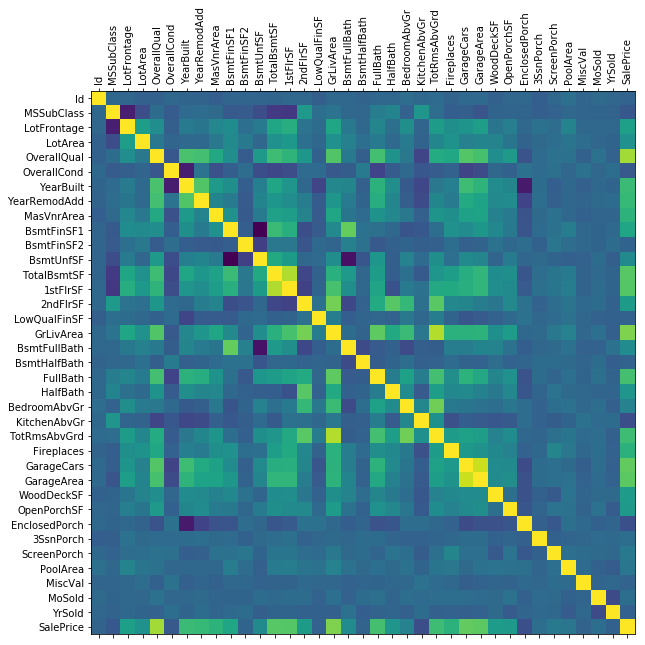

In [81]:
plot_corr(train)

In [14]:
# Sale price seems to be correlated with some features...

In [82]:
# Now let's use the one-liner below to get the correlation coefficients
# of SalePrice with all numeric features
target_correlations = train.corr().iloc[-1:, :].transpose().sort_values('SalePrice', ascending=False).round(2)
target_correlations

,SalePrice
SalePrice,1.00
OverallQual,0.79
GrLivArea,0.71
GarageCars,0.64
GarageArea,0.62
TotalBsmtSF,0.61
1stFlrSF,0.61
FullBath,0.56
TotRmsAbvGrd,0.53
YearBuilt,0.52


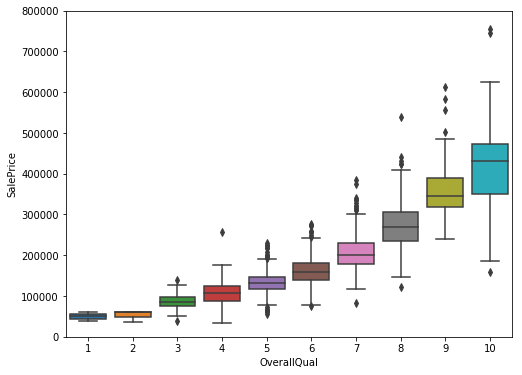

In [103]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

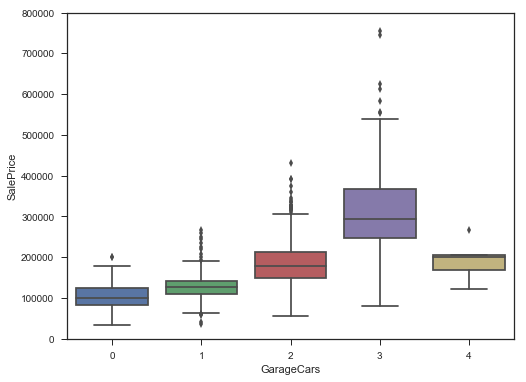

In [181]:
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

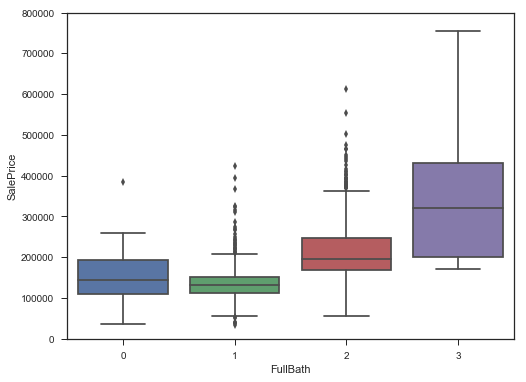

In [182]:
var = 'FullBath'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

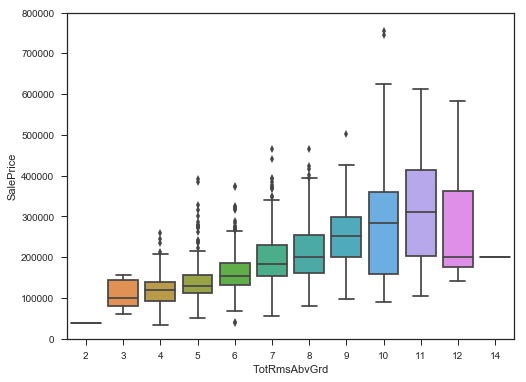

In [183]:
var = 'TotRmsAbvGrd'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

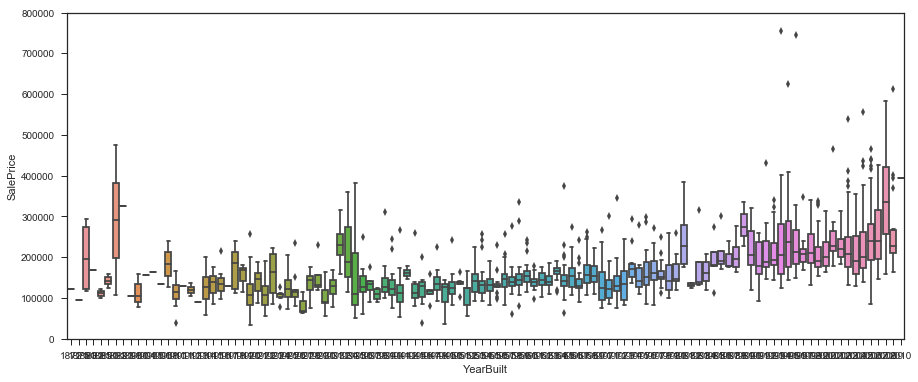

In [186]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

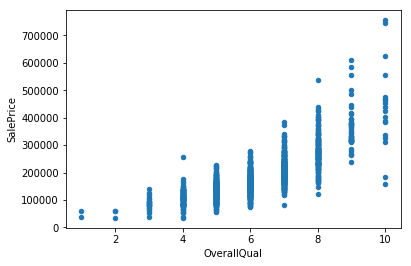

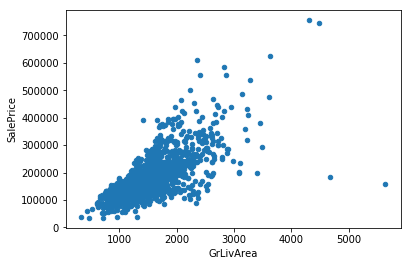

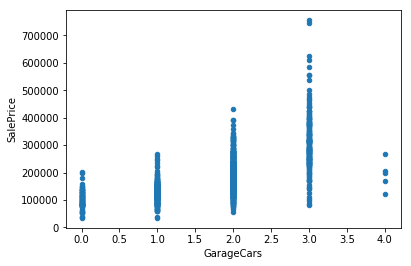

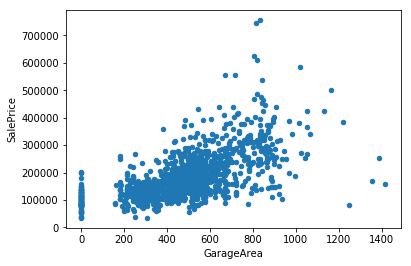

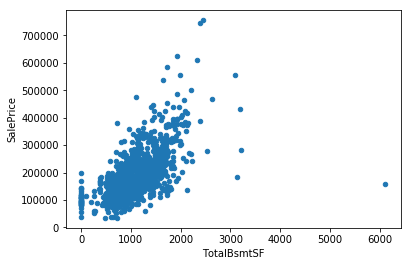

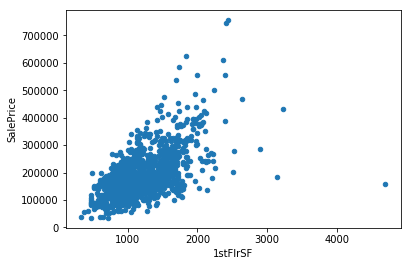

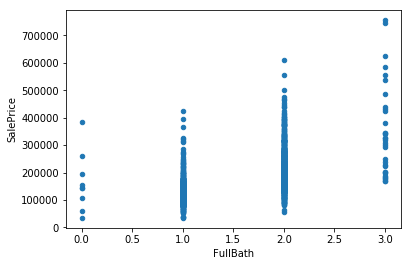

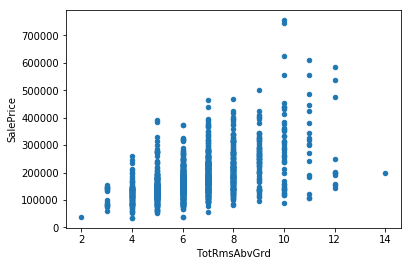

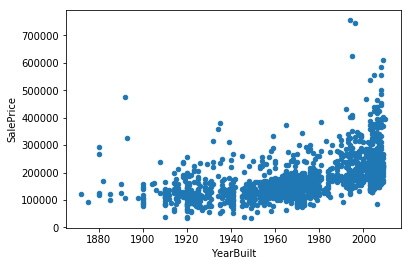

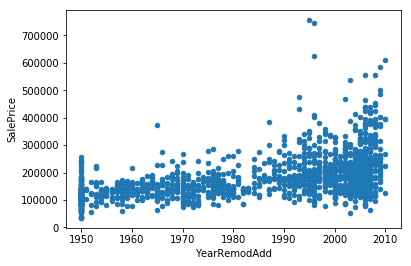

In [104]:
# Let's plot the 10 features that have the largest correlation coefficents:
for my_top_10_target_corr in target_correlations.index[1:11]:  
    train.plot(kind="scatter", x=my_top_10_target_corr, y="SalePrice")